# Chapter 10: Introduction to Artificial Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/Users/aberk/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## MNIST hand-written digits

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("./tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype('int')
y_test = mnist.test.labels.astype('int')

take a look at the data

In [5]:
X_train.shape

(55000, 784)

In [6]:
784 ** .5

28.0

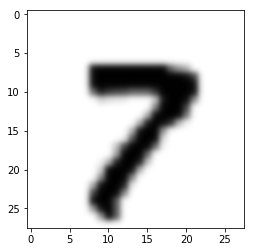

In [7]:
N = np.random.randint(0, 55000)
plt.imshow(X_train[N, :].reshape(28,28), cmap='binary', interpolation = 'gaussian');

## PCA with tensorflow

In [10]:
from time import time

In [14]:
t0 = time()
X_input = tf.constant(X_train, dtype=tf.float32)
X = X_input - tf.reduce_mean(X_input, 0)
XT = tf.transpose(X)
evals, evecs = tf.self_adjoint_eig(tf.matmul(XT, X))
pca = evecs[:, -2:]
X_transformed = tf.matmul(X, pca)

with tf.Session() as sess:
    X2D = X_transformed.eval()
print('{} seconds'.format(np.round(time() - t0, 2)))

11.81 seconds


In [15]:
from sklearn.decomposition import PCA

In [17]:
t0 = time()
pca = PCA(n_components=2)
X2D_sk = pca.fit_transform(X_train)
print('{} seconds'.format(np.round(time() - t0, 2)))

1.03 seconds


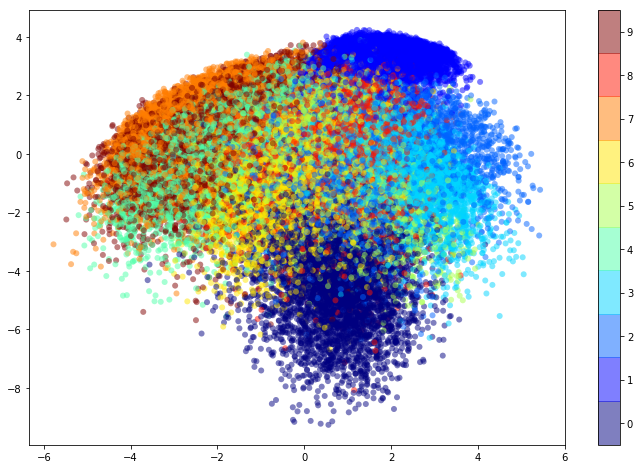

In [20]:
import matplotlib
plt.figure(figsize=(12,8))
cmap = plt.get_cmap('jet', 10)
norm = matplotlib.colors.BoundaryNorm(np.arange(-.5, 10,1), cmap.N)
plt.scatter(X2D[:,0], X2D[:,1], c=y_train, lw=0, alpha=.5, cmap = cmap, norm = norm)
plt.colorbar(ticks=np.linspace(0,9,10));

## Feedforward neural network (FNN) for MNIST

In [21]:
n_inputs = 28 * 28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [22]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

see the [rest of the notebook](https://github.com/ubcs3/2018-Winter-ML/blob/master/notes-2018-02-02.ipynb) to finish this off if so inclined. 

recall that the book can be [found here](https://proquestcombo.safaribooksonline.com/book/programming/9781491962282/10dot-introduction-to-artificial-neural-networks/ann_chapter_html#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE0OTE5NjIyODIlMkZpZG0xMzk5OTEyMDgxNzQyMDhfaHRtbCZxdWVyeT0=).